In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/time-series-forecasting-with-yahoo-stock-price")

print("Path to dataset files:", path)

100%|██████████| 33.1k/33.1k [00:00<00:00, 181kB/s]

Extracting files...
Path to dataset files: C:\Users\KIIT\.cache\kagglehub\datasets\arashnic\time-series-forecasting-with-yahoo-stock-price\versions\3


In [21]:
import pandas as pd
import os

# Path to your dataset
dataset_path = r'C:\Users\KIIT\.cache\kagglehub\datasets\arashnic\time-series-forecasting-with-yahoo-stock-price\versions\3'

# List all files in the dataset directory
files = os.listdir(dataset_path)

# Display the available files to find the relevant one
print(f"Available files: {files}")

# Load the dataset (assuming it's a CSV file; adjust filename if needed)
data_file = os.path.join(dataset_path, files[0])  # Replace with the correct file name if necessary

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_file)

# Display the first few rows of the data to understand its structure
print(df.head())



Available files: ['yahoo_stock.csv']
         Date         High          Low         Open        Close  \
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  


In [22]:
# Check the column names in the dataset
print("Column names in the dataset:", df.columns)


Column names in the dataset: Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 2.1: Handle Missing Data
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Step 2.2: Feature Engineering
# Use features 'Open', 'High', 'Low', 'Volume' to predict 'Close'
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Ensure the selected columns exist in the DataFrame
print("Selected features:", features)
print("Target feature:", target)

# Step 2.3: Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features].values)  # Convert to NumPy array and scale

# Step 2.4: Train/Test Split
X = scaled_data
y = df[target].values  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display information about the processed data
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")
print(f"Sample scaled feature data (first 5 rows):\n{X_train[:5]}")
print(f"Sample target data (first 5 values):\n{y_train[:5]}")


Missing values per column:
 Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64
Selected features: ['Open', 'High', 'Low', 'Volume']
Target feature: Close
Training data shape: (1460, 4), Testing data shape: (365, 4)
Sample scaled feature data (first 5 rows):
[[0.43909274 0.45140333 0.44670012 0.29290218]
 [0.58919195 0.57806321 0.59542138 0.18518743]
 [0.14049104 0.13134594 0.14209579 0.32594103]
 [0.18872318 0.17903384 0.17748572 0.37911243]
 [0.42430668 0.41649482 0.42864482 0.27593038]]
Sample target data (first 5 values):
[2640.87011719 2877.12988281 2064.45996094 2127.81005859 2596.26000977]


Linear Regression Performance:
Mean Absolute Error (MAE): 0.0033
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0056


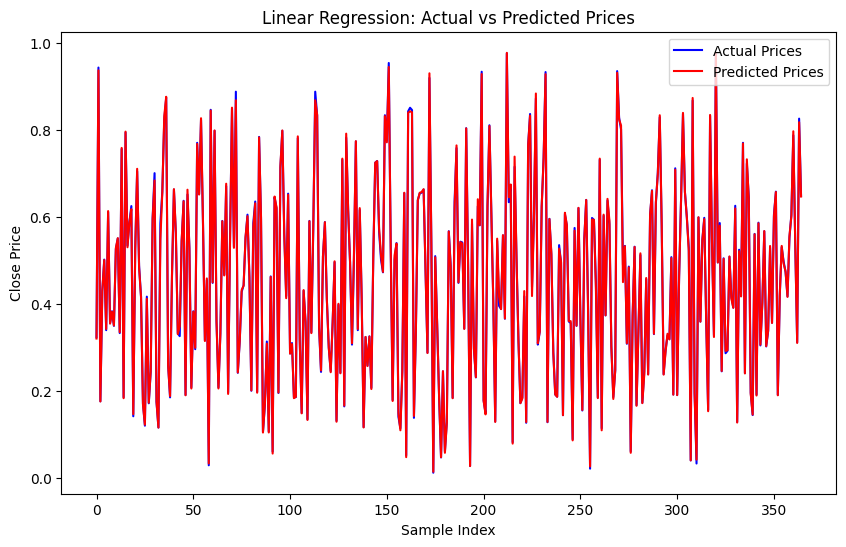

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 3.1: Train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Step 3.2: Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Step 3.3: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Step 3.4: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()


Missing values per column:
 Date                 0
High                 0
Low                  0
Open                 0
Close                0
Volume               0
Adj Close            0
20_day_moving_avg    0
dtype: int64
Epoch 1/50


C:\Users\KIIT\AppData\Local\Temp\ipykernel_31004\849084369.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['20_day_moving_avg'] = df['20_day_moving_avg'].fillna(method='bfill')
c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3519 - val_loss: 0.1492
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1205 - val_loss: 0.0751
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0699 - val_loss: 0.0483
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0466 - val_loss: 0.0333
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0328 - val_loss: 0.0244
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0256 - val_loss: 0.0193
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0207 - val_loss: 0.0158
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0176 - val_loss: 0.0136
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0153 - val_loss: 0.0119
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - val_loss: 0.0107
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - val_loss: 0.0097
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - val_loss: 0.

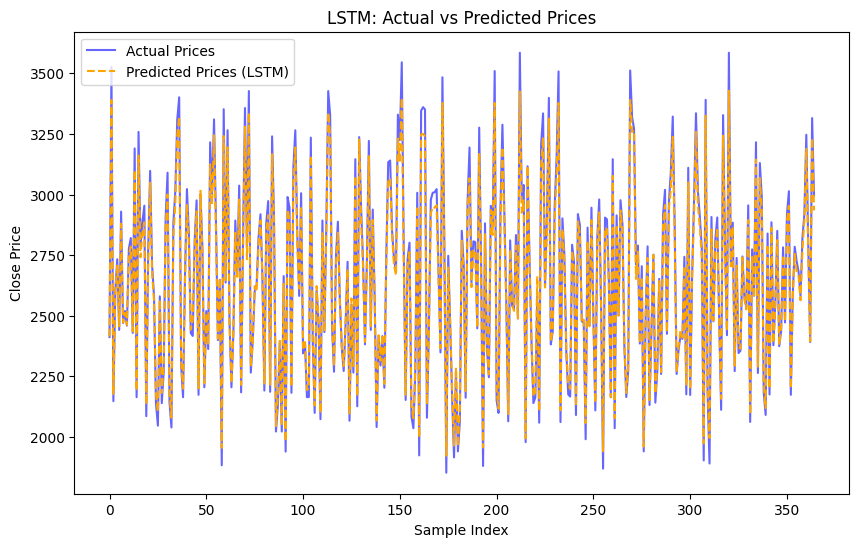

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Load and prepare the data (assuming df is already defined and contains the necessary columns)
print("Missing values per column:\n", df.isnull().sum())
df = df.dropna()  # Drop rows with missing values

# Feature Engineering - Add a 20-day moving average as an additional feature
df['20_day_moving_avg'] = df['Close'].rolling(window=20).mean()

# Handle missing values in the moving average column
df['20_day_moving_avg'] = df['20_day_moving_avg'].fillna(method='bfill')

# Features including the moving average
features = ['Open', 'High', 'Low', 'Volume', '20_day_moving_avg']
target = 'Close'

# Feature Scaling for X (features) and y (target)
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Scale the features
X = df[features].values
X_scaled = scaler_features.fit_transform(X)

# Scale the target variable (y)
y = df[target].values.reshape(-1, 1)  # Reshape to be 2D for scaling
y_scaled = scaler_target.fit_transform(y)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 3: Reshape data for LSTM (3D input: samples, time steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 4: Build the LSTM Model with increased complexity and regularization
lstm_model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    LSTM(units=100, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(units=1)  # Output the predicted price (single value)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the LSTM Model with increased epochs and batch size
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)

# Step 6: Predict using the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm)  # Inverse scaling to get actual price

# Flatten for comparison with y_test
y_pred_lstm = y_pred_lstm.flatten()
y_test_unscaled = scaler_target.inverse_transform(y_test).flatten()

# Step 7: Evaluate the model
mse_lstm = mean_squared_error(y_test_unscaled, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print("\nLSTM Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lstm:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred_lstm, label='Predicted Prices (LSTM)', color='orange', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('LSTM: Actual vs Predicted Prices')
plt.legend()
plt.show()



In [48]:
# Print the performance metrics for both models
print("Model Performance Comparison:")
print(f"Linear Regression - MSE: {mse:.4f}, RMSE: {rmse:.4f}")
print(f"LSTM Model         - MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}")

# Determine which model performed better based on RMSE
if rmse < rmse_lstm:
    print("Linear Regression performed better.")
else:
    print("LSTM performed better.")


Model Performance Comparison:
Linear Regression - MSE: 0.0000, RMSE: 0.0056
LSTM Model         - MSE: 2324.0339, RMSE: 48.2082
Linear Regression performed better.


In [49]:
import joblib
from tensorflow.keras.models import load_model

# Save Linear Regression Model
linear_regression_model_path = "C:/Users/KIIT/Documents/GitHub/AD-Lab/Lab-3/linear_regression_stock_model.pkl"
joblib.dump(linear_reg_model, linear_regression_model_path)
print(f"Linear Regression model saved at: {linear_regression_model_path}")

# Save LSTM Model
lstm_model_path = "C:/Users/KIIT/Documents/GitHub/AD-Lab/Lab-3/lstm_stock_model.h5"
lstm_model.save(lstm_model_path)
print(f"LSTM model saved at: {lstm_model_path}")


Linear Regression model saved at: C:/Users/KIIT/Documents/GitHub/AD-Lab/Lab-3/linear_regression_stock_model.pkl
LSTM model saved at: C:/Users/KIIT/Documents/GitHub/AD-Lab/Lab-3/lstm_stock_model.h5


In [50]:
import joblib
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming you have a dataframe 'df' with features and target
features = ['Open', 'High', 'Low', 'Volume', '20_day_moving_avg']
target = 'Close'

# Feature Scaling
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Fit the scalers
X = df[features].values
y = df[target].values.reshape(-1, 1)
scaler_features.fit(X)
scaler_target.fit(y)

# Save the scalers using joblib
joblib.dump(scaler_features, 'scaler_features.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')


['scaler_target.pkl']